## Employee Attrition Analysis


**Introduction**:   

Employee attrition is a critical concern for organizations as it directly impacts productivity, morale, and operational costs. Attrition occurs when employees leave an organization, whether due to retirement, resignation, or other reasons. Understanding the underlying factors driving attrition is essential for developing effective retention strategies and maintaining a stable workforce.

**Business Problem**:  

The business problem revolves around understanding and predicting employee attrition to mitigate its adverse effects on organizational stability and performance. By leveraging machine learning techniques, we aim to identify key factors contributing to attrition and develop predictive models that can forecast attrition risks accurately.

**Objective:**

The objective of this hypothesis testing notebook is to analyze the dataset comprehensively and identify significant factors associated with employee attrition. By conducting hypothesis tests across various demographic and organizational variables, we aim to uncover key insights into what influences attrition rates within the organization. These insights will provide a foundational understanding for further predictive modeling and strategic decision-making to enhance employee retention efforts.

## Data Overview

**Dataset Link**:  https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset        
**Records**: We have total 1470 Observations and 35 Features                    
**Columns Description**:
- Age: A period of employee life, measured by years from birth.
- Attrition: The departure of employees from the organization.
- BusinessTravel: Did the employee travel on a business trip or not.
- DailyRate: Employee salary for the period is divided by the amount of calendar days in the period.
- Department: In which department the Employee working.
- DistanceFromHome: How far the Employee live from the office location.
- Education: In education 1 means 'Below College', 2 means 'College', 3 means 'Bachelor', 4 means 'Master', 5 means 'Doctor'
- EducationField: In which field Employee complete his education.
- EmployeeCount: How many employee working in a department
- EmployeeNumber: An Employee Number is a unique number that has been assigned to each current and former State employee and elected official in the Position and Personnel DataBase (PPDB).
- Job involvement: Is the degree to which an employee identifies with their work and actively participates in it where 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'
- JobLevel: Job levels, also known as job grades and classifications, set the responsibility level and expectations of roles at your organization. They may be further defined by impact, seniority, knowledge, skills, or job title, and are often associated with a pay band. The way you structure your job levels should be dictated by the needs of your unique organization and teams.
- JobRole: What is the jobrole of an employee.
- JobSatisfaction: Employee job satisfaction rate where, 1 means 'Low', 2 means 'Medium', 3 means 'High', 4 means 'Very High'
- MaritalStatus: Marital status of the employee.
- MonthlyIncome: total monetary value paid by the organization to an employee.
- MonthlyRate: The per-day wage of the employee.
- NumCompaniesWorked: Before joining this organization how many organizations employee worked.
- Over18: Is the employee age over than 18 or not.
- OverTime: A Employee works more than 9 hours in any day or for more than 48 hours in any week.
- PercentSalaryHike:
- PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
- EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- StandardHours: Is the number of hours of production time that should have been used during an working period.
- StockOptionLevel:  Employee stock options, also known as ESOs, are stock options in the company’s stock granted by an employer to certain employees. Typically they are  granted to those in management or officer-level positions. Stock options give the employee the right to buy a certain amount of stock at a specific price, during a specific period of time. Options typically have expiration dates as well, by which the options must have been exercised, otherwise they will become worthless.
- TotalWorkingYears: Total years the employee working in any organization
- TrainingTimesLastYear: Last year how many times employee took training session.
- WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
- YearsAtCompany: How many years the employee working in the current organization
- YearsInCurrentRole: How many years the employee working in the current position
- YearsSinceLastPromotion: How many years the employee working in the current position after promotion
- YearsWithCurrManager: How many years the employee working under the current manager

## Methodology
1. Importing Python Libraries 
2. Loading and Extracting Basic Information from the Dataset 
3. Data Cleaning & Preprocessing 
4. EDA & Data Visualization 
5. Handing Imbalanceness 
6. Hypothesis Testing 
7. Conclussion

## 1. Importing Python Libraries

In [1]:
# For Data Loading,Cleaning Preprocessing
import numpy as np
import pandas as pd

# For EDA & Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=[10,5]

# For Ignoring Warnings 
import warnings
warnings.filterwarnings('ignore')

# Statistical Library 
import scipy.stats as stats
import statsmodels.api as sm

## 2. Loading and Extracting Basic Information from the Dataset 

In [2]:
# Loading the data from CSV file
data = pd.read_csv('Dataset//WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# First 5 observation 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# To check all columns
pd.set_option('display.max_columns',None)

In [5]:
# Random 5 observations
data.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
144,32,No,Travel_Frequently,689,Sales,9,2,Medical,1,195,4,Male,35,1,2,Sales Executive,4,Divorced,4668,22812,0,Y,No,17,3,4,80,3,9,2,4,8,7,0,7
738,39,No,Travel_Rarely,466,Research & Development,1,1,Life Sciences,1,1026,4,Female,65,2,4,Manufacturing Director,4,Married,12742,7060,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8
434,31,No,Travel_Rarely,1274,Research & Development,9,1,Life Sciences,1,581,3,Male,33,3,3,Manufacturing Director,2,Divorced,10648,14394,1,Y,No,25,4,4,80,1,13,6,4,13,8,0,8
1059,35,No,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,Male,76,3,1,Sales Representative,3,Married,2404,16192,1,Y,No,13,3,1,80,1,1,3,3,1,0,0,0
272,28,No,Travel_Rarely,1158,Research & Development,9,3,Medical,1,377,4,Male,94,3,1,Research Scientist,4,Married,2070,2613,1,Y,No,23,4,4,80,1,5,3,2,5,2,0,4


In [6]:
# shape 
data.shape

(1470, 35)

In [7]:
# Basic Informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Observations**
1. We only have Numeric/Integer and Object/String data types features. Hence there is no feature with Decimal/float. 
2. 26 features are numerical and 9 features are categorical
2. Attrition will be the target value. 

## 3. Data Cleaning & Preprocessing

### 3.1. Checking missing value

In [9]:
# Checking Nulls 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 3.2. Checking Duplicates

In [10]:
data.duplicated().sum()

0

### 3.3 Checking Balanceness  

In [11]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

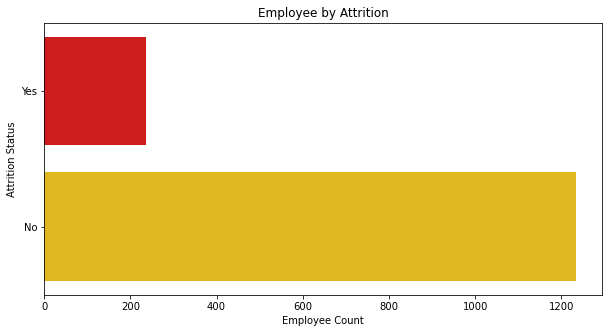

In [12]:
# Distribution of Attrition vs Non Attrition
sns.countplot(y= data['Attrition'],palette='hot')
plt.xlabel('Employee Count')
plt.ylabel('Attrition Status')
plt.title('Employee by Attrition')
plt.show()

In [13]:
# Dropping Unnecessary Columns
data.drop(['BusinessTravel','DailyRate','TrainingTimesLastYear','EmployeeCount','EmployeeNumber','YearsInCurrentRole', 
            'YearsSinceLastPromotion','YearsWithCurrManager','HourlyRate', 'MonthlyRate', 'NumCompaniesWorked','Over18',
            'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear'],axis=1,inplace=True)

#### Observations

1. Null Values: The dataset does not contain any null values, indicating that all entries have complete information across all features.

2. Duplicate Values: There are no duplicate records in the dataset, ensuring data integrity and avoiding redundancy in the analysis.

3. Imbalanced Target Column: Upon reviewing the target variable 'Attrition', we observed a significant class imbalance:
* Attrition = No: 1233 instances
* Attrition = Yes: 237 instances                       
This imbalance suggests that the dataset is skewed towards employees who did not experience attrition. To address this issue and ensure robust model training, we will apply statistical methods such as sampling techniques to balance the dataset.

##  4. EDA & Data Visualization

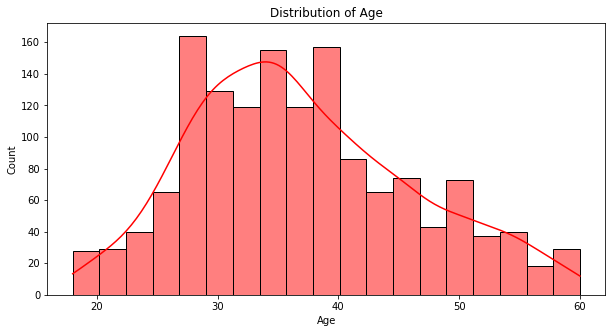

In [14]:
# Distribution of Age 
sns.histplot(data['Age'],kde=True,color='red')
plt.title('Distribution of Age')
plt.show()

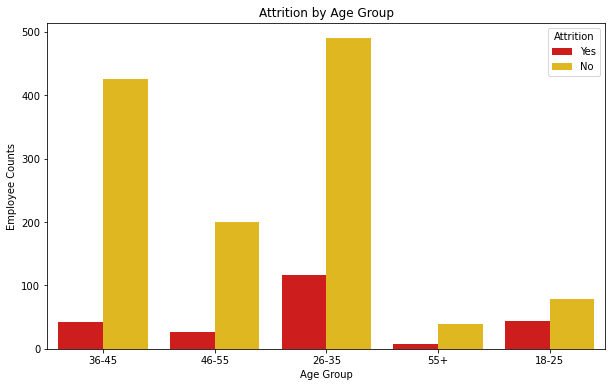

In [15]:
# Function to determine age group
def get_age_group(age):
    if 18 <= age <= 25:
        return "18-25"
    elif 26 <= age <= 35:
        return "26-35"
    elif 36 <= age <= 45:
        return "36-45"
    elif 46 <= age <= 55:
        return "46-55"
    elif age > 55:
        return "55+"
    else:
        return "Unknown"

# Plotting attrition by age group
plt.figure(figsize=(10, 6))

# Apply the function to create temporary Age_Group for plotting
data['Age_Group'] = data['Age'].apply(get_age_group)

# Plotting attrition by Age_Group
sns.countplot(x='Age_Group', hue='Attrition', data=data, palette='hot')

# Customizing plot attributes
plt.title("Attrition by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Employee Counts')
plt.legend(title='Attrition', loc='upper right')

# Show the plot
plt.show()

# Remove the temporary column from the DataFrame
data.drop(columns=['Age_Group'], inplace=True)

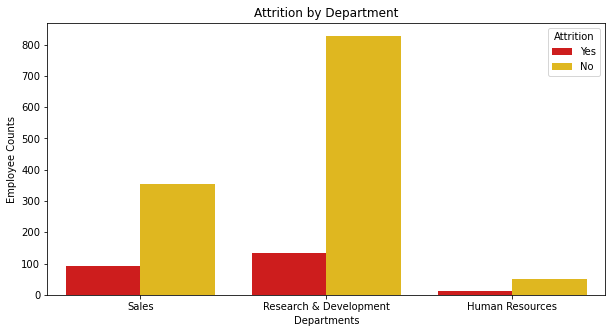

In [16]:
# Department wise Attrition
sns.countplot(x='Department',hue='Attrition', data=data, palette='hot')
plt.title("Attrition by Department")
plt.xlabel('Departments')
plt.ylabel('Employee Counts')
plt.show()

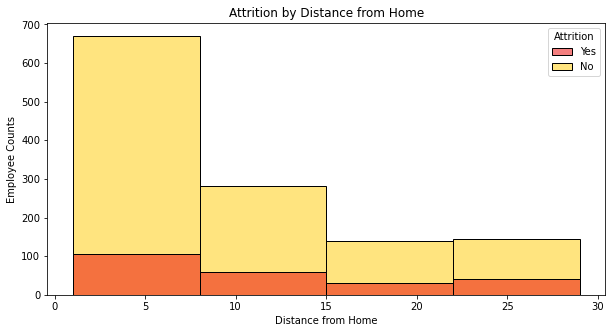

In [17]:
# Distance From Home wise Attrition
#sns.countplot(x='DistanceFromHome',hue='Attrition', data=data, palette='hot')
sns.histplot(x='DistanceFromHome',hue='Attrition', data=data, palette='hot',bins=4)
plt.title("Attrition by Distance from Home")
plt.xlabel('Distance from Home')
plt.ylabel('Employee Counts')
plt.show()

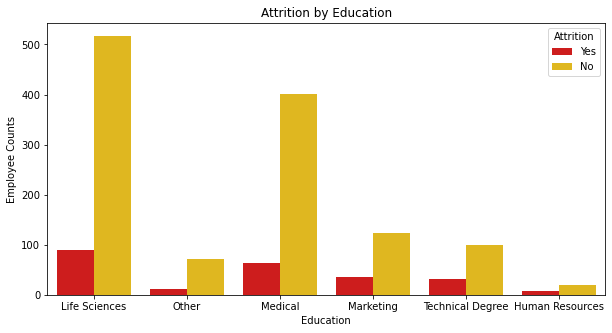

In [18]:
# Education wise Attrition
sns.countplot(x='EducationField',hue='Attrition', data=data, palette='hot')
plt.title("Attrition by Education")
plt.xlabel('Education')
plt.ylabel('Employee Counts')
plt.show()

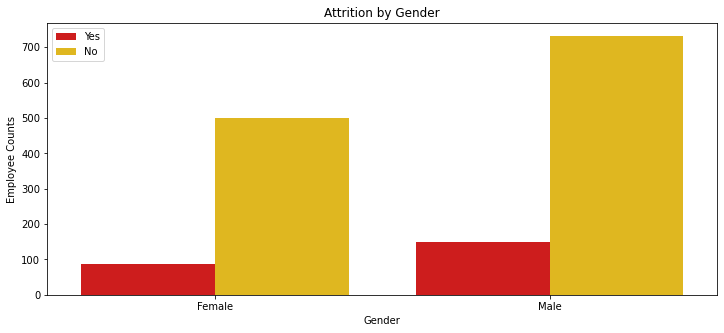

In [19]:
# Gender wise Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition', data=data, palette='hot')
plt.title("Attrition by Gender")
plt.xlabel('Gender')
plt.ylabel('Employee Counts')
plt.legend(loc='best')
plt.show()

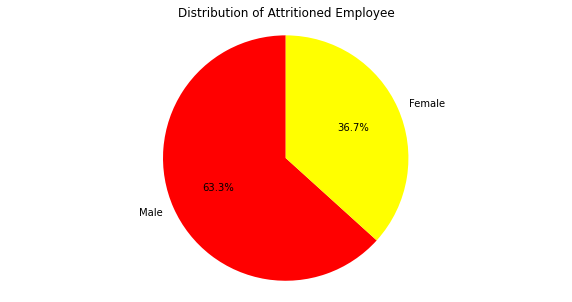

In [20]:
# Gender Distribution 
temp_df= data[data['Attrition']=='Yes']
temp_df= temp_df['Gender'].value_counts().reset_index()

plt.pie(temp_df['Gender'],labels=temp_df['index'],startangle=90,autopct='%1.1f%%',colors=['red','yellow'])
plt.title('Distribution of Attritioned Employee')
plt.axis('equal')
plt.show()

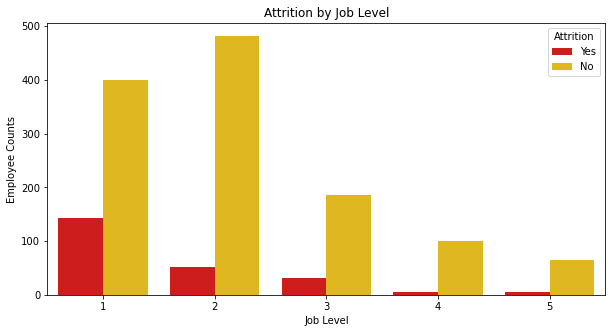

In [21]:
# Job Level wise Attrition
sns.countplot(x='JobLevel',hue='Attrition', data=data, palette='hot')
plt.title("Attrition by Job Level")
plt.xlabel('Job Level')
plt.ylabel('Employee Counts')
plt.show()

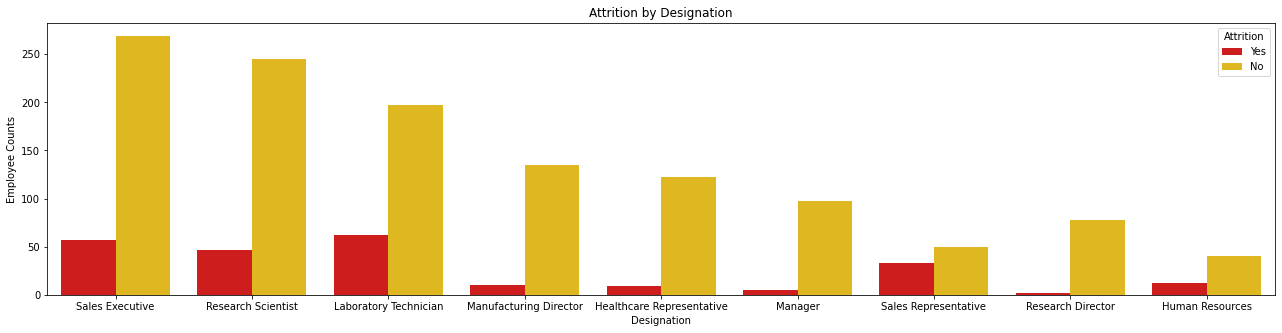

In [22]:
# Designation wise Attrition
plt.figure(figsize=(22,5))
sns.countplot(x='JobRole',hue='Attrition', data=data, palette='hot')
plt.title("Attrition by Designation")
plt.xlabel('Designation')
plt.ylabel('Employee Counts')
plt.show()

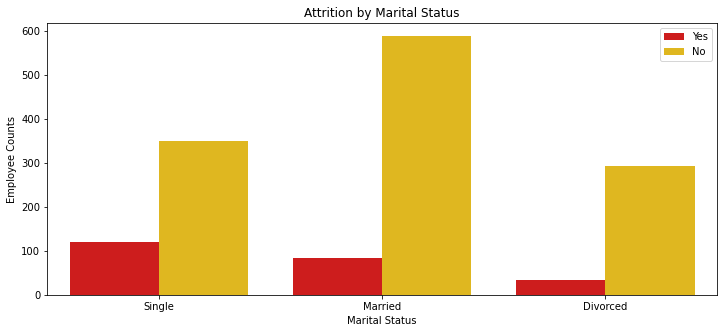

In [23]:
# Marital Status wise Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='MaritalStatus',hue='Attrition', data=data, palette='hot')
plt.title("Attrition by Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Employee Counts')
plt.legend(loc='best')
plt.show()

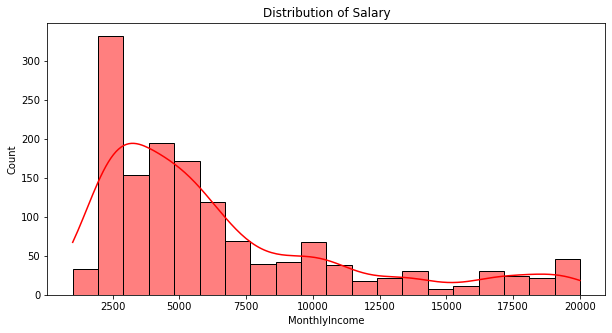

In [24]:
# Distribution of Monthly Income 
sns.histplot(data['MonthlyIncome'],kde=True,color='red')
plt.title('Distribution of Salary')
plt.show()

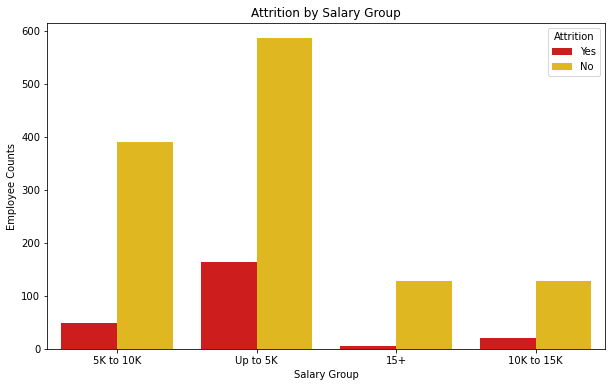

In [25]:
# Function to determine salary group
def get_salary_group(income):
    if income <= 5000:
        return "Up to 5K"
    elif 5000 < income <= 10000:
        return "5K to 10K"
    elif 10000 < income <= 15000:
        return "10K to 15K"
    elif income > 15000:
        return "15+"
    else:
        return "Unknown"

# Plotting attrition by salary group
plt.figure(figsize=(10, 6))

# Apply the function to create temporary Salary_Group for plotting
data['Salary_Group'] = data['MonthlyIncome'].apply(get_salary_group)

# Plotting attrition by Salary_Group
sns.countplot(x='Salary_Group', hue='Attrition', data=data, palette='hot')

# Customizing plot attributes
plt.title("Attrition by Salary Group")
plt.xlabel('Salary Group')
plt.ylabel('Employee Counts')
plt.legend(title='Attrition', loc='upper right')

# Show the plot
plt.show()

# Remove the temporary column from the DataFrame
data.drop(columns=['Salary_Group'], inplace=True)

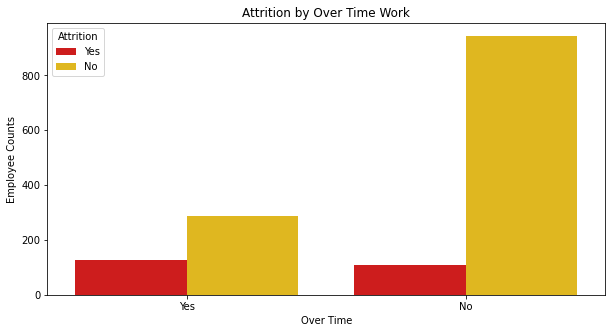

In [26]:
# Over Time wise Attrition
sns.countplot(x='OverTime',hue='Attrition', data=data, palette='hot')
plt.title("Attrition by Over Time Work")
plt.xlabel('Over Time')
plt.ylabel('Employee Counts')
plt.show()

In [27]:
# Average Satisfaction Ratio
AVR= data[data['Attrition']=='Yes']
AVR= AVR[['JobSatisfaction','WorkLifeBalance','EnvironmentSatisfaction','RelationshipSatisfaction']].agg(['min','max','mean']).reset_index()
AVR.rename(columns={'index':'Parameter'},inplace=True)
AVR

,Parameter,JobSatisfaction,WorkLifeBalance,EnvironmentSatisfaction,RelationshipSatisfaction
0,min,1.000000,1.000000,1.000000,1.000000
1,max,4.000000,4.000000,4.000000,4.000000
2,mean,2.468354,2.658228,2.464135,2.599156


In [28]:
# Measure of Skewness 
data[['Age','DistanceFromHome','Education','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']].skew()

Age                  0.413286
DistanceFromHome     0.958118
Education           -0.289681
MonthlyIncome        1.369817
PercentSalaryHike    0.821128
TotalWorkingYears    1.117172
YearsAtCompany       1.764529
dtype: float64

**Observation:**          
We have observed the data based on different factors associated with Attrition. 
Based on the analysis of employee attrition across various factors, several insights have been derived:

### Attrition by Education:
- Life Sciences: 606
- Medical: 464
- Marketing: 159
- Technical Degree: 132
- Others: 82
- HR: 27 

- Employees with backgrounds in Life Sciences and Medical fields exhibit higher attrition rates compared to other educational backgrounds. This suggests potential areas for targeted retention strategies or further investigation into career development opportunities.

### Attrition by Overtime:
- Yes: 127
- No: 110 

- Employees who work overtime show a higher attrition rate compared to those who do not. Managing workload and ensuring work-life balance could be crucial in reducing attrition among these employees.

### Attrition by Department:
- Human Resources: 5%
- Sales: 39%
- Research & Development: 56% 

- The Research & Development department has the highest attrition rate, followed by Sales and Human Resources. Understanding department-specific challenges and implementing tailored retention initiatives may help mitigate attrition risks.

### Attrition by Salary Group:
- Up to 5k: 163
- 5k-10k: 49
- 10k-15k: 20
- 15k+: 5

- Employees in lower salary brackets, particularly those earning up to 5k per month, experience higher attrition rates. Addressing compensation structures and ensuring equitable pay may positively impact retention efforts.

### Attrition by Gender:
- Male: 63%
- Female: 37% 

- Male employees show a higher attrition rate compared to female employees. Exploring gender-specific factors influencing attrition and implementing inclusive policies could help improve retention outcomes.

### Attrition by Age Group 
- 18-25: 123
- 26-35: 606
- 36-45: 468
- 46-55: 226
- 55+: 47 

- Employees in the age group of 26-35 years represent the highest proportion of attrition. Targeting career progression opportunities and professional development programs tailored to this demographic may enhance retention strategies.

### Satisfaction Score of Attritioned Employees:
- Job Satisfaction: Min 1.0, Max 4.0, Mean 2.47
- Work Life Balance: Min 1.0, Max 4.0, Mean 2.66
- Environment Satisfaction: Min 1.0, Max 4.0, Mean 2.46
- Relationship Satisfaction: Min 1.0, Max 4.0, Mean 2.60

### Skewness:
- Age: 0.41 (slightly positively skewed)
- Distance From Home: 0.96 (positively skewed)
- Education: -0.29 (negatively skewed, but very close to normal)
- Monthly Income: 1.37 (highly positively skewed)
- Percent Salary Hike: 0.82 (positively skewed)
- Total Working Years: 1.12 (positively skewed)
- Years At Company: 1.76 (positively skewed)

These insights underscore the importance of data-driven decision-making in crafting effective HR policies aimed at reducing attrition and fostering a more engaged workforce. Further exploration and continuous monitoring of these factors will be essential for sustaining organizational stability and growth.

## 5. Handing Imbalanceness

Addressing class imbalance is crucial to ensure robust model performance in predicting employee attrition. With 'Attrition' being significantly skewed towards the 'No' category (1233 instances) compared to 'Yes' (237 instances), applying appropriate sampling techniques is imperative. Techniques such as oversampling the minority class ('Yes' attrition) using SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class ('No' attrition) can help balance the dataset. This approach enhances the model's ability to learn from both classes effectively, thereby improving the accuracy and reliability of attrition prediction models.

But first we need to encode each categorical features followed by making two dataset one is for Attrition and another for remaning.

In [29]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


### 5.1. Label Encodeing 

In machine learning, datasets often contain categorical variables represented as labels in the form of words or numbers. To facilitate model training, these categorical labels need to be converted into numerical form. Label encoding is a technique used to transform categorical labels into numeric labels, making the data understandable for machine learning algorithms. Each unique label is assigned a unique integer, allowing algorithms to process and interpret the data effectively during training.

In [30]:
# Target Variable(Attrition)
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})

# Encode Binary Variables
data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

# Encode categorical columns which are ordinal, using LabelEncoding
# Apply Label Encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [31]:
# Sampling : Smote Method 
from imblearn.over_sampling import SMOTE 

X= data.drop('Attrition',axis=1)
y= data['Attrition']

smote= SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X,y)

df_resampled= pd.concat([X_over, y_over],axis=1)

In [32]:
# Final Data
print(df_resampled.shape)
df_resampled.head()

(2466, 21)


,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,Attrition
0,41,2,1,2,1,2,1,3,2,7,4,2,5993,1,11,3,1,8,1,6,1
1,49,1,8,1,1,3,0,2,2,6,2,1,5130,0,23,4,4,10,3,10,0
2,37,1,2,2,4,4,0,2,1,2,3,2,2090,1,15,3,2,7,3,0,1
3,33,1,3,4,1,4,1,3,1,6,3,1,2909,1,11,3,3,8,3,8,0
4,27,1,2,1,3,1,0,3,1,2,2,1,3468,0,12,3,4,6,3,2,0


## 6. Hypothesis Testing

# Gender 

**Null Hypothesis (H₀):**     
There is no association between attrition and gender.              
**Alternative Hypothesis (H₁):**    
There is an association between attrition and gender.

In [33]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df_resampled['Attrition'], df_resampled['Gender'])

print("Contingency Table:")
print(contingency_table)

Contingency Table:
Gender       0    1
Attrition          
0          732  501
1          972  261


In [34]:
from scipy.stats import chi2_contingency
# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis (There is a significant association between attrition and gender)")
else:
    print("\nFail to reject the null hypothesis (There is no significant association between attrition and gender)")


Chi-Square Test:
Chi-Square Statistic: 108.48365587224131
P-value: 2.1057962273198545e-25

Reject the null hypothesis (There is a significant association between attrition and gender)


# Salary 

**Null Hypothesis (H0):**          
There is no significant difference in salary between employees who have attrition ("Yes") and those who do not ("No").    
**Alternative Hypothesis (H1):**    
There is a significant difference in salary between employees who have attrition ("Yes") and those who do not ("No").

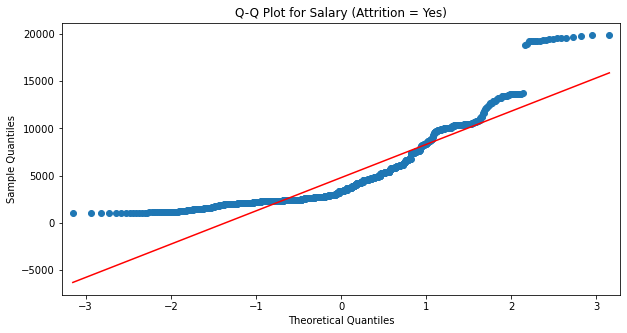

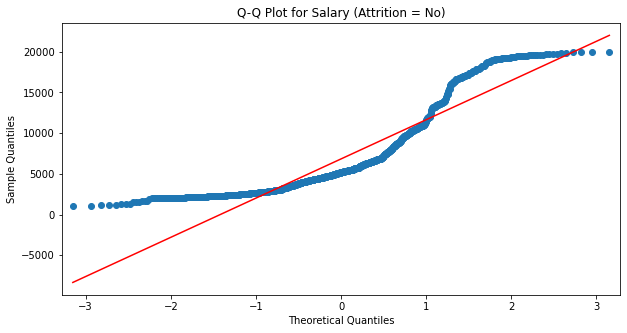

In [35]:
# Checking Normality to finalize Statistical Test 
# Separate salary data based on attrition
salary_yes = df_resampled[df_resampled['Attrition'] == 1]['MonthlyIncome']
salary_no = df_resampled[df_resampled['Attrition'] == 0]['MonthlyIncome']

# Q-Q plot for salary data where Attrition is 'Yes'
sm.qqplot(salary_yes, line='s')
plt.title('Q-Q Plot for Salary (Attrition = Yes)')
plt.show()

# Q-Q plot for salary data where Attrition is 'No'
sm.qqplot(salary_no, line='s')
plt.title('Q-Q Plot for Salary (Attrition = No)')
plt.show()

**Observation**: 
    
1. Since we were dealing with non-normally distributed data, we have to use non-parametric tests. So, we will perform Mann-Whitney U Test.          

2. Mann-Whitney U Test:     
The Mann-Whitney U test is a non-parametric test that can be used to determine whether there is a significant difference between the distributions of two independent samples.             
This is an alternative to the t-test when the data is not normally distributed.

In [36]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(salary_yes, salary_no)
print('Mann-Whitney U Test:')
print(f'Statistic: {stat}, P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis (no significant difference in salaries)')
else:
    print('Reject the null hypothesis (significant difference in salaries)')

Mann-Whitney U Test:
Statistic: 529120.0, P-value: 5.034577678585311e-39
Reject the null hypothesis (significant difference in salaries)


# Percentage Hike

**Null Hypothesis (H₀):**      
There is no significant difference in the distribution of hike percentages between employees who left (attrition = 'Yes') and those who did not (attrition = 'No').                    
**Alternative Hypothesis (H₁):**
There is a significant difference in the distribution of hike percentages between employees who left (attrition = 'Yes') and those who did not (attrition = 'No').

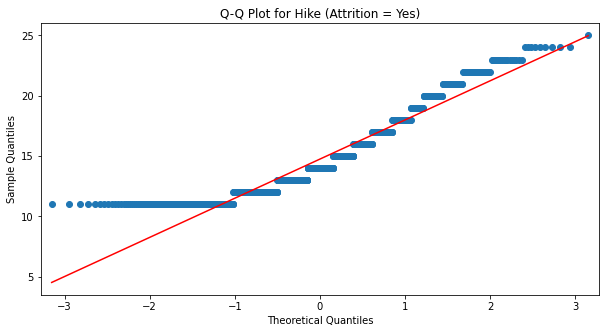

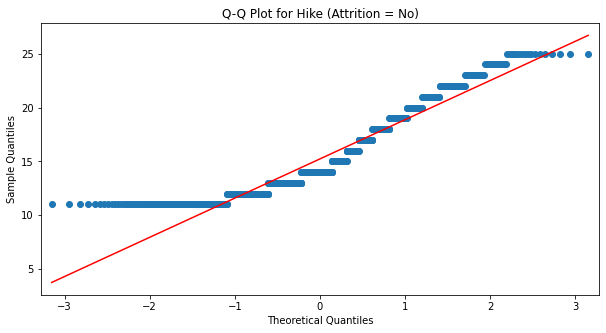

In [37]:
# Checking Normality to finalize Statistical Test 
# Separate salary data based on attrition
Hike_yes = df_resampled[df_resampled['Attrition'] == 1]['PercentSalaryHike']
Hike_no = df_resampled[df_resampled['Attrition'] == 0]['PercentSalaryHike']

# Q-Q plot for salary data where Attrition is 'Yes'
sm.qqplot(Hike_yes, line='s')
plt.title('Q-Q Plot for Hike (Attrition = Yes)')
plt.show()

# Q-Q plot for salary data where Attrition is 'No'
sm.qqplot(Hike_no, line='s')
plt.title('Q-Q Plot for Hike (Attrition = No)')
plt.show()

**Observation**: 
    
1. Since we were dealing with non-normally distributed data, we have to use non-parametric tests. So, we will perform Mann-Whitney U Test.          

2. Mann-Whitney U Test:     
The Mann-Whitney U test is a non-parametric test that can be used to determine whether there is a significant difference between the distributions of two independent samples.             
This is an alternative to the t-test when the data is not normally distributed.

In [38]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(Hike_yes, Hike_no)
print('Mann-Whitney U Test:')
print(f'Statistic: {stat}, P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis (no significant difference in Hike)')
else:
    print('Reject the null hypothesis (significant difference in Hike)')

Mann-Whitney U Test:
Statistic: 713948.0, P-value: 0.008553720046417086
Reject the null hypothesis (significant difference in Hike)


# Distance From Home

**Null Hypothesis (H₀):**      
There is no significant difference in the distribution of distance from home to office between employees who left (attrition = 'Yes') and those who did not (attrition = 'No').    
**Alternative Hypothesis (H₁):**
There is a significant difference in the distribution of distance from home to office between employees who left (attrition = 'Yes') and those who did not (attrition = 'No').

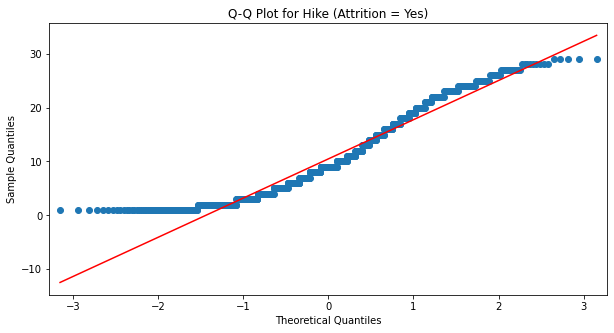

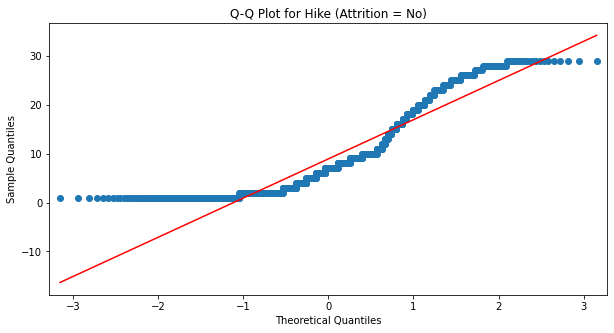

In [39]:
# Checking Normality to finalize Statistical Test 
# Separate salary data based on attrition
DistanceFromHome_yes = df_resampled[df_resampled['Attrition'] == 1]['DistanceFromHome']
DistanceFromHome_no = df_resampled[df_resampled['Attrition'] == 0]['DistanceFromHome']

# Q-Q plot for salary data where Attrition is 'Yes'
sm.qqplot(DistanceFromHome_yes, line='s')
plt.title('Q-Q Plot for Hike (Attrition = Yes)')
plt.show()

# Q-Q plot for salary data where Attrition is 'No'
sm.qqplot(DistanceFromHome_no, line='s')
plt.title('Q-Q Plot for Hike (Attrition = No)')
plt.show()

In [40]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(DistanceFromHome_yes, DistanceFromHome_no)
print('Mann-Whitney U Test:')
print(f'Statistic: {stat}, P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis (no significant difference in Distance from home)')
else:
    print('Reject the null hypothesis (significant difference in Distance from home)')

Mann-Whitney U Test:
Statistic: 889205.0, P-value: 2.5730281320109396e-13
Reject the null hypothesis (significant difference in Distance from home)


# YearsAtCompany


**Null Hypothesis (H₀):**      
There is no significant difference in the distribution of Tenure(Years at Company) between employees who left (attrition = 'Yes') and those who did not (attrition = 'No').    
**Alternative Hypothesis (H₁):**
There is a significant difference in the distribution of Tenure(Years at Company) between employees who left (attrition = 'Yes') and those who did not (attrition = 'No').

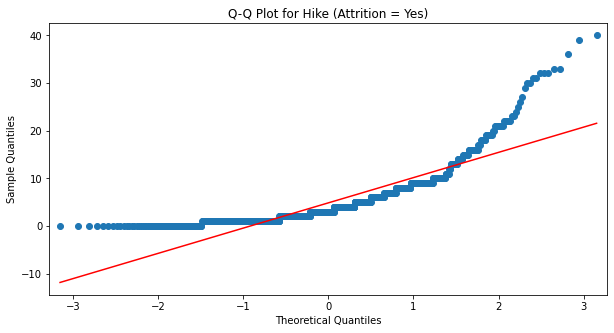

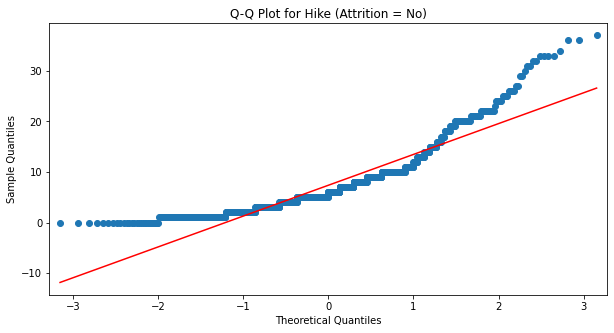

In [41]:
# Checking Normality to finalize Statistical Test 
# Separate salary data based on attrition
YearsAtCompany_yes = df_resampled[df_resampled['Attrition'] == 1]['YearsAtCompany']
YearsAtCompany_no = df_resampled[df_resampled['Attrition'] == 0]['YearsAtCompany']

# Q-Q plot for salary data where Attrition is 'Yes'
sm.qqplot(YearsAtCompany_yes, line='s')
plt.title('Q-Q Plot for Hike (Attrition = Yes)')
plt.show()

# Q-Q plot for salary data where Attrition is 'No'
sm.qqplot(YearsAtCompany_no, line='s')
plt.title('Q-Q Plot for Hike (Attrition = No)')
plt.show()

In [42]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(YearsAtCompany_yes, YearsAtCompany_no)
print('Mann-Whitney U Test:')
print(f'Statistic: {stat}, P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis (no significant difference in Tenure)')
else:
    print('Reject the null hypothesis (significant difference in Tenure)')

Mann-Whitney U Test:
Statistic: 520314.5, P-value: 2.904553980550971e-42
Reject the null hypothesis (significant difference in Tenure)


# Overtime 

**Null Hypothesis (H₀):**     
There is no association between attrition and Overtime.              
**Alternative Hypothesis (H₁):**    
There is an association between attrition and Overtime.

In [43]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df_resampled['Attrition'], df_resampled['OverTime'])

print("Contingency Table:")
print(contingency_table)

Contingency Table:
OverTime     0    1
Attrition          
0          944  289
1          799  434


In [44]:
from scipy.stats import chi2_contingency
# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis (There is a significant association between attrition and OverTime)")
else:
    print("\nFail to reject the null hypothesis (There is no significant association between attrition and OverTime)")


Chi-Square Test:
Chi-Square Statistic: 40.57722770155905
P-value: 1.889965008873056e-10

Reject the null hypothesis (There is a significant association between attrition and OverTime)


Based on the results of the hypothesis tests:

1. **Attrition by Gender:** Reject the null hypothesis (There is a significant association between attrition and gender). This suggests that gender plays a role in attrition within the organization.
   
2. **Attrition by Salary:** Reject the null hypothesis (significant difference in salaries). This indicates that there are significant differences in attrition rates across different salary groups.

3. **Attrition by Hike:** Reject the null hypothesis (significant difference in Hike). This implies that there are significant differences in attrition rates related to salary hikes.

4. **Attrition by Distance from Home:** Reject the null hypothesis (significant difference in Distance from home). This suggests that distance from home significantly impacts attrition rates.

5. **Attrition by Tenure (Years at Company):** Reject the null hypothesis (significant difference in Tenure). This indicates that the number of years an employee has been with the company significantly affects attrition rates.

6. **Attrition by Overtime:** Reject the null hypothesis (There is a significant association between attrition and OverTime). This implies that overtime has a significant impact on attrition rates.

# Conclusion:

1. These results indicate that several factors — **Gender**, **Montly Salary**, **Salary Hike**, **Distance from Home**, **Tenure(Years at Company)**, and **Overtime**  are significantly associated with employee attrition in the organization.

2. Understanding these factors can help in developing targeted strategies to mitigate attrition and improve retention rates. 

3. Further investigation into these factors may reveal specific policies or practices that could be adjusted to reduce attrition and enhance employee satisfaction and retention.

# Recommendations: 
Based on the findings from the hypothesis testing regarding factors affecting employee attrition, here are some recommendations:

1. **Gender Disparities:**
   - Conduct a gender equity assessment to identify and address any disparities in opportunities, promotions, and work-life balance that might be contributing to higher attrition rates among one gender.

2. **Salary and Compensation:**
   - Implement a structured approach to salary reviews and adjustments that ensures fairness and transparency across all salary bands. Consider benchmarking against industry standards to remain competitive.

3. **Salary Hike Strategies:**
   - Develop clear guidelines and criteria for salary hikes that are based on performance and tenure. This can help in rewarding and retaining high-performing employees more effectively.

4. **Distance from Home:**
   - Explore options such as remote work or flexible work arrangements to accommodate employees who face long commutes. This can improve work-life balance and reduce attrition among those affected by commute distances.

5. **Employee Tenure:**
   - Implement retention strategies that recognize and reward long-serving employees. This could include career development opportunities, mentorship programs, or special recognition for milestones.

6. **Overtime Management:**
   - Review and optimize workload distribution and resource allocation to minimize the need for excessive overtime. Providing adequate support and resources can help reduce burnout and attrition associated with overtime.

7. **Employee Satisfaction Initiatives:**
   - Conduct regular employee satisfaction surveys to gauge sentiment and identify areas for improvement. Act on feedback to enhance workplace culture, morale, and overall job satisfaction.

8. **Training and Development:**
   - Invest in continuous learning and development programs that empower employees to acquire new skills and advance in their careers within the organization. This can increase job satisfaction and loyalty.

9. **Retention-focused Policies:**
   - Develop and implement targeted retention strategies based on demographic and departmental insights gathered from the analysis. Tailoring retention efforts can yield more effective results.

10. **Monitoring and Review:**
    - Establish metrics and KPIs to monitor the effectiveness of these recommendations over time. Regularly review attrition rates and employee feedback to refine strategies and maintain a proactive approach to retention.

By addressing these recommendations, organizations can create a more supportive and engaging workplace environment that fosters employee loyalty, reduces attrition rates, and ultimately contributes to long-term organizational success.